# Pandas and numpy has been used for data manipulation and numerical calculations. Matplotlib and seaborn has been used for data visualisation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading dataset


In [2]:
df=pd.read_csv(r"C:\Users\disha\Downloads\EDA2\EDA2\adult_with_headers.csv")
print(df)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

# analyzing the data

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# check for duplication

In [5]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

# Missing values calculation

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# statistical summary

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
Numerical Variables:
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


# min-max scaling

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
abs_vals = np.abs(df[numeric_cols])
max_vals = abs_vals.max()
print(max_vals)

age                    90
fnlwgt            1484705
education_num          16
capital_gain        99999
capital_loss         4356
hours_per_week         99
dtype: int64


In [10]:
   print((df - max_vals) / max_vals)

            age  capital_gain  capital_loss education  education_num  \
0     -0.566667     -0.978260          -1.0       NaN        -0.1875   
1     -0.444444     -1.000000          -1.0       NaN        -0.1875   
2     -0.577778     -1.000000          -1.0       NaN        -0.4375   
3     -0.411111     -1.000000          -1.0       NaN        -0.5625   
4     -0.688889     -1.000000          -1.0       NaN        -0.1875   
...         ...           ...           ...       ...            ...   
32556 -0.700000     -1.000000          -1.0       NaN        -0.2500   
32557 -0.555556     -1.000000          -1.0       NaN        -0.4375   
32558 -0.355556     -1.000000          -1.0       NaN        -0.4375   
32559 -0.755556     -1.000000          -1.0       NaN        -0.4375   
32560 -0.422222     -0.849758          -1.0       NaN        -0.4375   

         fnlwgt  hours_per_week income marital_status native_country  \
0     -0.947790       -0.595960    NaN            NaN          

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

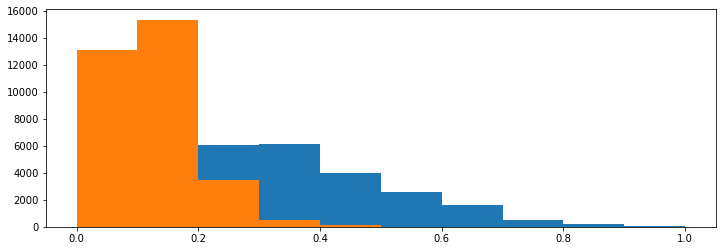

In [11]:

from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
numerical_data = df[numerical_cols]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numerical_data)
df_scaled = pd.DataFrame(scaled_data, columns=numerical_cols)
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(scaled_data [:,0])
ax.hist(scaled_data[:,1])

Min-Max scaling ensures that all features are on the same scale, which can improve the performance and convergence of gradient-based algorithms.

# standard scaling

In [12]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
numerical_data = df[numerical_cols]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
df_scaled = pd.DataFrame(scaled_data, columns=numerical_cols)
print(df_scaled.head())




        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  


In [13]:
print(df_scaled.var())

age               1.000031
fnlwgt            1.000031
education_num     1.000031
capital_gain      1.000031
capital_loss      1.000031
hours_per_week    1.000031
dtype: float64


(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([-1.68163079, -0.28661144,  1.10840791,  2.50342726,  3.8984466 ,
         5.29346595,  6.6884853 ,  8.08350465,  9.478524  , 10.87354334,
        12.26856269]),
 <BarContainer object of 10 artists>)

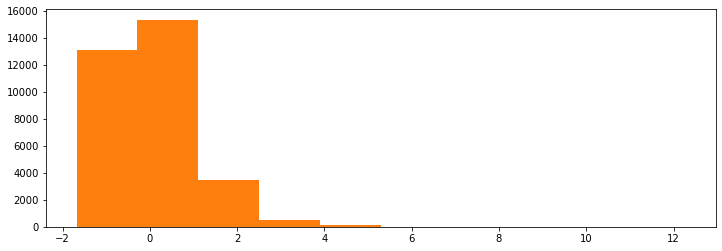

In [14]:
from sklearn.preprocessing import StandardScaler

fig, ax= plt.subplots(figsize=(12, 4))
scaled_data = scaler.fit_transform(numerical_data)
scaler = StandardScaler()
ax.hist(scaled_data [:,0])
ax.hist(scaled_data [:,1])

Standard scaling ensures that each feature contributes equally to the model by centering the data around 0 and standardizing the variance.

Standard Scaling is often preferred when the data follows a normal distribution or when using algorithms that assume data is normally distributed 
Min-Max Scaling is preferred when the distribution of data is not normal and when using algorithms that benefit from having data within a specific range
Given the dataset contains features like 'capital_gain' and 'capital_loss' which can have extreme outliers, Min-Max scaling may be more suitable as it ensures all features are within a specific range

# Encoding Techniques:

# Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
cols_to_encode = [col for col in categorical_cols if df[col].nunique() < 5]
df_encoded = pd.get_dummies(df, columns=cols_to_encode)
print(df_encoded.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  sex_ Female  \
0          2174             0              40   United-States            0   
1             0             0         

# Use Label Encoding for categorical variables with more than 5 categories.

In [16]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
label_encoders = {}
for col in categorical_cols:
    if df[col].nunique() > 5:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

print(df.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship    race      sex  capital_gain  capital_loss  \
0           1             1   White     Male          2174             0   
1           4             0   White     Male             0             0   
2           6             1   White     Male             0             0   
3           6             0   Black     Male             0             0   
4          10             5   Black   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1              13           

One-Hot Encoding
Pros: Ensures that no ordinal relationship is assumed among categories.
Works well with algorithms that can handle sparse inputs 
 Makes it easier to understand the model coefficients for each category.

Cons: May slow down model training and require more memory.

Label Encoding
Pros:Easy to implement and doesn't increase the dimensionality of the dataset.
suitable for algorithms that can leverage the ordinal nature of the categories (e.g., decision trees).

Cons:Imposes an ordinal relationship between categories, which may not be appropriate for all datasets.
Can lead to misleading results if the encoded numerical values are interpreted as having a meaningful order.

# Feature Engineering

# Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [17]:
df['capital_diff'] = df['capital_gain'] - df['capital_loss']
def categorize_hours(hours):
    if hours < 30:
        return 'part-time'
    elif hours <= 40:
        return 'full-time'
    else:
        return 'overtime'
df['work_hours_per_week_category'] = df['hours_per_week'].apply(categorize_hours)
print(df.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship    race      sex  capital_gain  capital_loss  \
0           1             1   White     Male          2174             0   
1           4             0   White     Male             0             0   
2           6             1   White     Male             0             0   
3           6             0   Black     Male             0             0   
4          10             5   Black   Female             0             0   

   hours_per_week  native_country  income  capital_diff  \
0              40              39   <=50K          2174  

1. capital_diff
 The capital_gain and capital_loss features represent financial gains and losses. 
Combining these into a single feature that reflects the net capital gain/loss can provide a more comprehensive view of an individual's financial status.

2. work_hours_per_week_category
The hours_per_week feature indicates the number of hours worked per week. 
Categorizing this into bins (e.g., part-time, full-time, overtime) can capture different work patterns and their potential impact on income.

# Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [18]:
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
skewed_features = df[numerical_features].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewed_features)


Skewness of numerical features:
 capital_gain      11.953848
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64


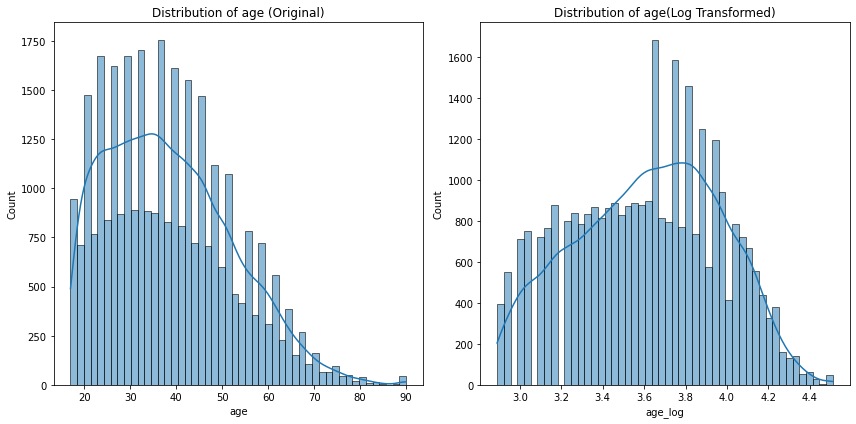

Skewness of 'age' before transformation: 0.5587433694130484
Skewness of 'age_log' after transformation: -0.11334149286035627


In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=50, kde=True)
plt.title('Distribution of age (Original)')
df['age_log'] = df['age'].apply(lambda x: np.log1p(x)) 
plt.subplot(1, 2, 2)
sns.histplot(df['age_log'], bins=50, kde=True)
plt.title('Distribution of age(Log Transformed)')
plt.tight_layout()
plt.show()
print("Skewness of 'age' before transformation:", df['age'].skew())
print("Skewness of 'age_log' after transformation:", df['age_log'].skew())

The age feature often has high skewness
By applying a log transformation to age, we can reduce its skewness, improve the normality of the data, and potentially enhance the performance of our models.

# Feature Selection

# Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [20]:
from sklearn.ensemble import IsolationForest
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier'] = iso_forest.fit_predict(df[numerical_features])
df_no_outliers = df[df['outlier'] == 1].copy()
df_outliers = df[df['outlier'] == -1].copy()


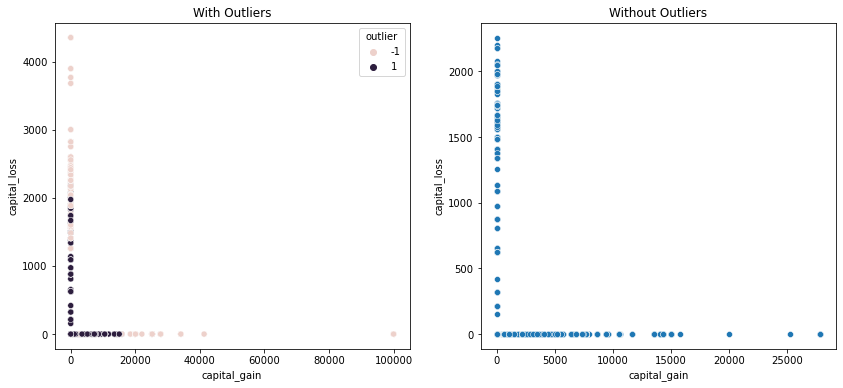

Original DataFrame shape: (32561, 19)
DataFrame without outliers shape: (30933, 19)


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(ax=axes[0], x='capital_gain', y='capital_loss', hue='outlier', data=df)
axes[0].set_title('With Outliers')
sns.scatterplot(ax=axes[1], x='capital_gain', y='capital_loss', data=df_no_outliers)
axes[1].set_title('Without Outliers')

plt.show()
print("Original DataFrame shape:", df.shape)
print("DataFrame without outliers shape:", df_no_outliers.shape)

df_no_outliers.drop(columns=['outlier'], inplace=True)

Outliers can skew the distribution of the data, leading to biased statistical measures like mean and standard deviation.
Removal of outliers can lead to more accurate and reliable models by focusing on the true patterns in the data.

# Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [22]:
!pip install ppscore

# calculate the PPS matrix

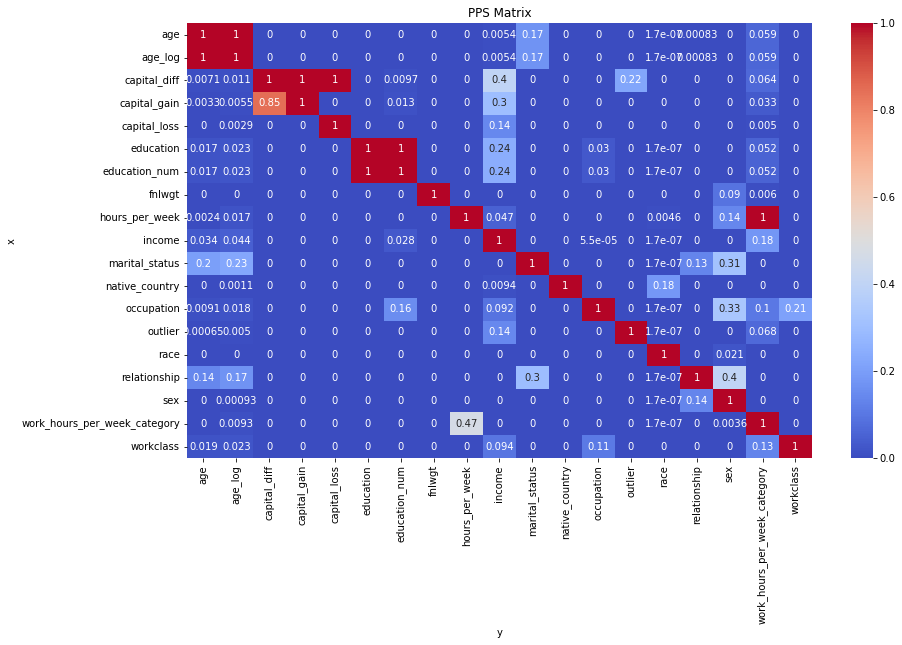

In [26]:
import ppscore as pps
pps_matrix = pps.matrix(df)
plt.figure(figsize=(14, 8))
sns.heatmap(pps_matrix.pivot(index='x', columns='y', values='ppscore'), annot=True, cmap='coolwarm')
plt.title('PPS Matrix')
plt.show()



# Calculate the correlation matrix

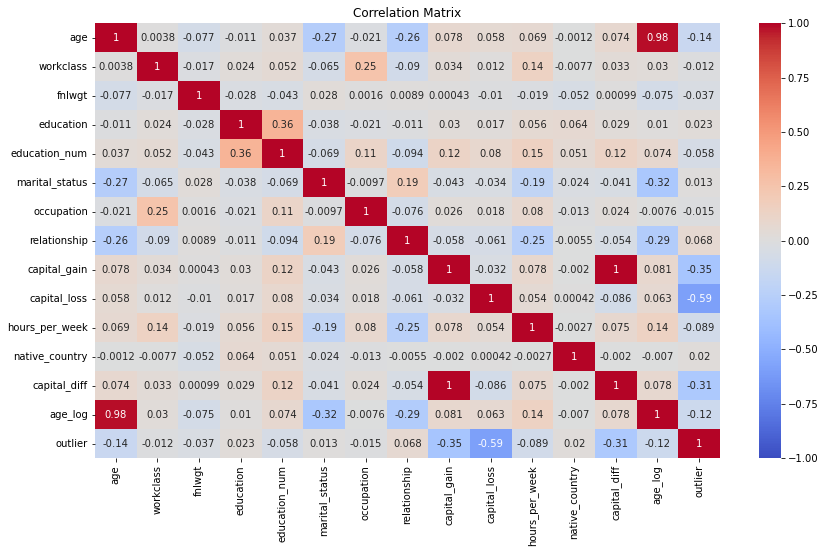

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix is effective in identifying linear relationships but fails to capture non-linear patterns
PPS can identify both linear and non-linear relationships, providing a more comprehensive view of feature interactions.